In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("moritzm00/utkface-cropped")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/utkface-cropped


In [3]:
import numpy as np
import pandas as pd 
import cv2
from IPython.display import Image
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
print(os.listdir("/kaggle/input/utkface-cropped/"))

['UTKFace']


In [6]:
def imshow(img):
    plt.imshow(img, interpolation='bicubic')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

In [7]:
onlyfiles = os.listdir("/kaggle/input/utkface-cropped//UTKFace")
y = np.array([[[i.split('_')[0]],[i.split('_')[1]]] for i in onlyfiles])
# y = np.array([[i.split('_')[1] for i in onlyfiles]]).T
print(y.shape)
print(y[0])

(23708, 2, 1)
[['26']
 ['0']]


In [8]:
X_data =[]
for file in onlyfiles:
    face = cv2.imread("/kaggle/input/utkface-cropped/UTKFace/"+file,cv2.IMREAD_COLOR)
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face =cv2.resize(face, (32,32) )
    X_data.append(face)
X_data=np.array(X_data)
X_data.shape

(23708, 32, 32, 3)

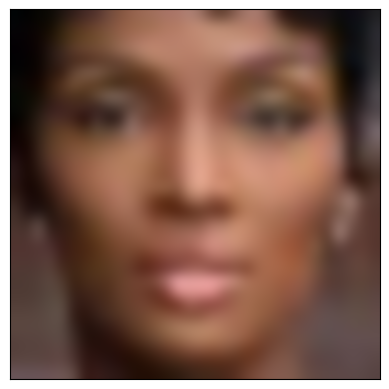

[['22']
 ['1']]


In [9]:
X = np.squeeze(X_data)
imshow(X[1])
print(y[1])

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33)
y_train=[y_train[:,1],y_train[:,0]]
y_valid=[y_valid[:,1],y_valid[:,0]]

In [11]:
print("X_train shape:", X_train.shape)  # (num_samples, 32, 32, 3)
print("y_train shapes:", y_train[0].shape, y_train[1].shape)  # (num_samples,), (num_samples,)
print("X_valid shape:", X_valid.shape)
print("y_valid shapes:", y_valid[0].shape, y_valid[1].shape)


X_train shape: (15884, 32, 32, 3)
y_train shapes: (15884, 1) (15884, 1)
X_valid shape: (7824, 32, 32, 3)
y_valid shapes: (7824, 1) (7824, 1)


In [12]:
y_train = [y_train[0].astype('float32'), y_train[1].astype('float32')]
y_valid = [y_valid[0].astype('float32'), y_valid[1].astype('float32')]


In [13]:
y_gender_train, y_age_train = y_train
y_gender_valid, y_age_valid = y_valid
print(y_gender_train)
print(y_gender_valid)


[[0.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]
[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [49]:
def gen_gender_model():
    inputs = tf.keras.layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, 3, activation='relu')(inputs)
    x = layers.Conv2D(32, 3, activation='relu')(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Conv2D(64, 3, activation='relu')(x)
    x = layers.Conv2D(64, 3, activation='relu')(x)
    x = layers.MaxPool2D(2)(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Conv2D(84, 3, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    output = layers.Dense(1, activation='sigmoid', name='gender_out')(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=output)
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [65]:
import os
import shutil

# Train the model
gender_model = gen_gender_model()
gender_model.fit(X_train, y_gender_train, epochs=75, batch_size=240, validation_data=(X_valid, y_gender_valid))
# Define the save directory
save_dir = '/kaggle/working/gender_model_cnn_dir_new'
os.makedirs(save_dir, exist_ok=True)

# Save the model in the directory
gender_model.save(os.path.join(save_dir, 'Gender_Model_CNN_new.h5'))

# Compress the directory into a zip file for downloading
shutil.make_archive(save_dir, 'zip', save_dir)

print("Model saved and compressed successfully! You can download it as a zip file.")


Epoch 1/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.5478 - loss: 2.2018 - val_accuracy: 0.7244 - val_loss: 0.5478
Epoch 2/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7200 - loss: 0.5607 - val_accuracy: 0.7758 - val_loss: 0.4721
Epoch 3/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7666 - loss: 0.4869 - val_accuracy: 0.8217 - val_loss: 0.3954
Epoch 4/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8042 - loss: 0.4323 - val_accuracy: 0.8338 - val_loss: 0.3596
Epoch 5/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8197 - loss: 0.3952 - val_accuracy: 0.8414 - val_loss: 0.3561
Epoch 6/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8279 - loss: 0.3756 - val_accuracy: 0.8441 - val_loss: 0.3385
Epoch 7/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8356 - loss: 0.3575 - val_accuracy: 0.8515 - val_loss: 0.3306
Epoch 8/75
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8407 - loss: 0.3544 - val_accuracy: 0.8607 - v

In [53]:
gender_loss, gender_accuracy = gender_model.evaluate(X_valid, y_gender_valid)
print(f"Gender Model - Loss: {gender_loss}, Accuracy: {gender_accuracy}")


245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8885 - loss: 0.2537
Gender Model - Loss: 0.26080188155174255, Accuracy: 0.884458065032959


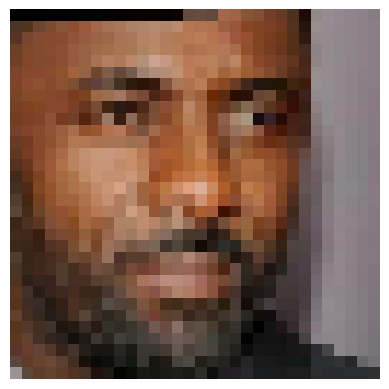

True Gender: Male
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Gender Value: 0.001422613742761314
Predicted Gender: Male


In [73]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the saved model
model_path = "/kaggle/working/gender_model_dir/Gender_Model_RES.h5"  # Replace with the correct path
gender_model = load_model(model_path)

# Load your validation data (ensure it matches the data used during training)
# Example: Assuming X_valid and y_valid are already loaded

# Select an example from the validation set
p_id = 59
plt.imshow(X_valid[p_id])  # Show the image
plt.axis('off')  # Hide axes
plt.show()

# True gender label (invert interpretation: 0 -> Male, 1 -> Female)
true_gender = "Male" if y_valid[0][p_id] == 0 else "Female"
print(f"True Gender: {true_gender}")

# Prepare the image batch for prediction
image_batch = np.expand_dims(X_valid[p_id], axis=0)

# Predict using the gender model
gender_prediction = gender_model.predict(image_batch)

# Display the raw prediction value and interpret it with inverted logic
predicted_gender_value = gender_prediction[0][0]  # Extract the prediction value
predicted_gender = "Male" if predicted_gender_value < 0.5 else "Female"

print(f"Predicted Gender Value: {predicted_gender_value}")
print(f"Predicted Gender: {predicted_gender}")


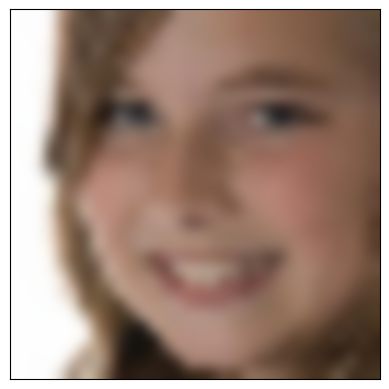

True Gender: Female
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Predicted Gender Value: 0.9608619213104248
Predicted Gender: Female


In [52]:
import numpy as np

# Select an example from the validation set
p_id = 3
imshow(X_valid[p_id])

# True gender label (invert interpretation: 0 -> Male, 1 -> Female)
true_gender = "Male" if y_valid[0][p_id] == 0 else "Female"
print(f"True Gender: {true_gender}")

# Prepare the image batch for prediction
image_batch = np.expand_dims(X_valid[p_id], axis=0)

# Predict using the gender model
gender_prediction = gender_model.predict(image_batch)

# Display the raw prediction value and interpret it with inverted logic
predicted_gender_value = gender_prediction[0][0]  # Extract the prediction value
predicted_gender = "Male" if predicted_gender_value < 0.5 else "Female"

print(f"Predicted Gender Value: {predicted_gender_value}")
print(f"Predicted Gender: {predicted_gender}")


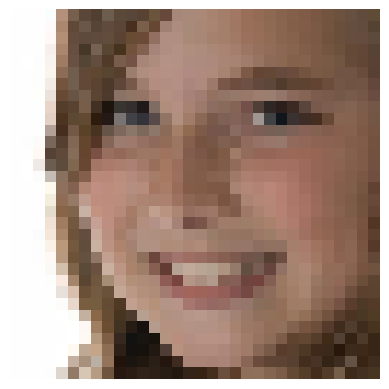

True Gender: Female
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
Predicted Gender Value: 0.9608619213104248
Predicted Gender: Female


In [77]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the saved model
model_path = "/kaggle/working/Gender_Model_CNN.h5"  # Replace with the correct path
gender_model = load_model(model_path)

# Load your validation data (ensure it matches the data used during training)
# Example: Assuming X_valid and y_valid are already loaded

# Select an example from the validation set
p_id = 3
plt.imshow(X_valid[p_id])  # Show the image
plt.axis('off')  # Hide axes
plt.show()

# True gender label (invert interpretation: 0 -> Male, 1 -> Female)
true_gender = "Male" if y_valid[0][p_id] == 0 else "Female"
print(f"True Gender: {true_gender}")

# Prepare the image batch for prediction
image_batch = np.expand_dims(X_valid[p_id], axis=0)

# Predict using the gender model
gender_prediction = gender_model.predict(image_batch)

# Display the raw prediction value and interpret it with inverted logic
predicted_gender_value = gender_prediction[0][0]  # Extract the prediction value
predicted_gender = "Male" if predicted_gender_value < 0.5 else "Female"

print(f"Predicted Gender Value: {predicted_gender_value}")
print(f"Predicted Gender: {predicted_gender}")


245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Gender Model Metrics:
Accuracy: 0.89
Precision: 0.88
Recall: 0.91
F1-Score: 0.89


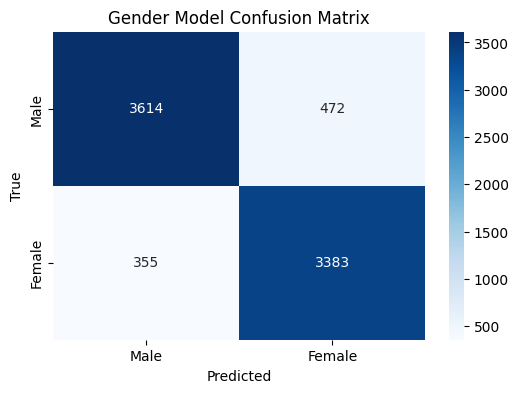

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Predict gender for the entire validation dataset
gender_predictions = gender_model.predict(X_valid)
predicted_genders = (gender_predictions > 0.5).astype(int)  # Convert probabilities to binary (0/1)

# True gender labels
true_genders = y_valid[0].astype(int)

# Metrics calculation
accuracy = accuracy_score(true_genders, predicted_genders)
precision = precision_score(true_genders, predicted_genders)
recall = recall_score(true_genders, predicted_genders)
f1 = f1_score(true_genders, predicted_genders)

print(f"Gender Model Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(true_genders, predicted_genders)

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Gender Model Confusion Matrix")
plt.show()


In [14]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.losses import BinaryCrossentropy, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam

# 1. Shared feature extractor: ResNet50 (without top layers)
base_model = ResNet50(weights=None, include_top=False, input_shape=(32, 32, 3))

# Use the output of ResNet50 for both tasks
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling

# Shared dense layer
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

# 2. Model for Gender Classification (binary classification)
gender_output = Dense(64, activation='relu')(x)
gender_output = Dense(1, activation='sigmoid', name='gender_output')(gender_output)

# 3. Model for Age Prediction (regression)
age_output = Dense(64, activation='relu')(x)
age_output = Dense(1, activation='relu', name='age_output')(age_output)

# 4. Create the Gender Model
gender_model_RES = Model(inputs=base_model.input, outputs=gender_output)

# 5. Create the Age Model
age_model = Model(inputs=base_model.input, outputs=age_output)

# 6. Compile the Models

# Compile the Gender Model (binary classification)
gender_model_RES.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Compile the Age Model (regression)
age_model.compile(optimizer=Adam(), loss=MeanAbsoluteError(), metrics=['mae'])



In [15]:
import random  # Import the random module

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss', restore_best_weights=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/' + str(random.random()))  # This will now work
]


In [16]:
import os
import shutil

# Train the Gender Model
gender_model_RES.fit(X_train, y_train[0], epochs=50, batch_size=240, validation_data=(X_valid, y_valid[0]), callbacks=callbacks, shuffle=True)

# Save the gender model
gender_model_RES.save('Gender_Model_RES.h5')

# Create a folder in the Kaggle workspace
save_dir = '/kaggle/working/gender_model_dir'
os.makedirs(save_dir, exist_ok=True)

# Save the gender model in the folder
gender_model_RES.save(os.path.join(save_dir, 'Gender_Model_RES.h5'))

# Compress the folder into a zip file for easy download
shutil.make_archive(save_dir, 'zip', save_dir)

print("Model saved and compressed successfully! You can download it as a zip file.")


Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 87s 473ms/step - accuracy: 0.6001 - loss: 0.8657 - val_accuracy: 0.5484 - val_loss: 0.6882
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.8098 - loss: 0.4290 - val_accuracy: 0.5321 - val_loss: 0.6499
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.8595 - loss: 0.3291 - val_accuracy: 0.7023 - val_loss: 0.5535
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.8699 - loss: 0.2924 - val_accuracy: 0.8071 - val_loss: 0.4276
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.8974 - loss: 0.2414 - val_accuracy: 0.8258 - val_loss: 0.3954
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.9135 - loss: 0.2058 - val_accuracy: 0.8105 - val_loss: 0.4242
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.9020 - loss: 0.2276 - val_accuracy: 0.8172 - val_loss: 0.5067
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.9271 - loss: 0.1749 - val_accuracy: 0.8318 -

In [17]:
# Evaluate the Gender Model on validation data
gender_loss, gender_accuracy = gender_model_RES.evaluate(X_valid, y_valid[0], verbose=1)
print("Gender Model - Loss:", gender_loss)
print("Gender Model - Accuracy:", gender_accuracy)


245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8516 - loss: 0.3809
Gender Model - Loss: 0.387477308511734
Gender Model - Accuracy: 0.8499488830566406


In [18]:
import os
import shutil

# Source image path within Kaggle environment
source_image_path = "/kaggle/input/utkface-cropped/UTKFace/12_1_0_20170103200659679.jpg.chip.jpg"

# Destination directory on your local machine (replace with your desired path)
destination_directory = "/kaggle/working/directory/" 

# Create the destination directory if it doesn't exist
os.makedirs(destination_directory, exist_ok=True)

# Construct the full destination path
destination_image_path = os.path.join(destination_directory, "downloaded_image4.jpg") 

# Copy the image to your local machine
shutil.copyfile(source_image_path, destination_image_path)

print(f"Image saved to: {destination_image_path}") 

Image saved to: /kaggle/working/directory/downloaded_image4.jpg


In [74]:
import numpy as np
import cv2
from keras.models import load_model

# Load model
model = load_model("/kaggle/working/gender_model_cnn_dir_new/Gender_Model_CNN_new.h5")

# Test with a specific image
image_path = "/kaggle/input/utkface-cropped/UTKFace/110_1_3_20170110155139762.jpg.chip.jpg"
image = cv2.imread(image_path)
print(image.shape)
resized_image = cv2.resize(image, (32, 32))
input_image = np.expand_dims(resized_image / 255.0, axis=0)  # Normalize and add batch dimension

# Predict
prediction = model.predict(input_image)
print(f"Raw Prediction: {prediction}")
gender = "Male" if prediction[0][0] < 0.5 else "Female"
print(f"Predicted Gender: {gender}")


(200, 200, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Raw Prediction: [[0.48765177]]
Predicted Gender: Male


245/245 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step
Gender Model Metrics:
Accuracy: 0.85
Precision: 0.83
Recall: 0.87
F1-Score: 0.85


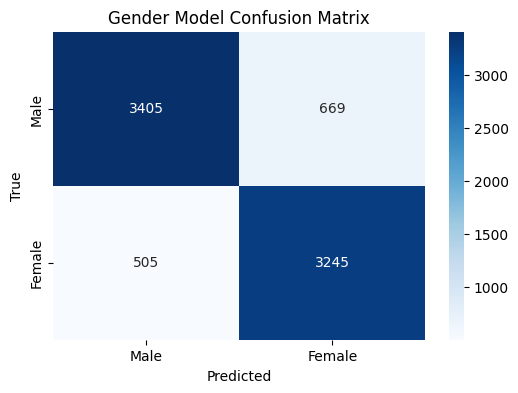

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Predict gender for the entire validation dataset
gender_predictions = gender_model_RES.predict(X_valid)
predicted_genders = (gender_predictions > 0.5).astype(int)  # Convert probabilities to binary (0/1)

# True gender labels
true_genders = y_valid[0].astype(int)

# Metrics calculation
accuracy = accuracy_score(true_genders, predicted_genders)
precision = precision_score(true_genders, predicted_genders)
recall = recall_score(true_genders, predicted_genders)
f1 = f1_score(true_genders, predicted_genders)

print(f"Gender Model Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(true_genders, predicted_genders)

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Gender Model Confusion Matrix")
plt.show()
